In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import yfinance as yf

def fetch_nsei_data_from_yahoo(start_date, end_date):
    nsei_data = yf.download('^NSEI', start=start_date, end=end_date)
    return nsei_data


def check_null_duplicates(df):
    # Check for null values in the entire DataFrame
    print("Null values in the entire DataFrame:")
    print(df.isnull().any().any())

    # Check for null values in each column
    print("\nNull values in each column:")
    print(df.isnull().any())

    # Check for null values in each row
    print("\nNull values in each row:")
    print(df.isnull().sum(axis=1))

    # Check for duplicate rows in the entire DataFrame
    print("\nDuplicate rows in the entire DataFrame:")
    print(df.duplicated().any())

    # Check for duplicate rows based on all columns
    print("\nDuplicate rows based on all columns:")
    print(df.duplicated().any())

def detect_outliers_zscore(df, columns, threshold=2.5):
    z_scores = (df[columns] - df[columns].mean()) / df[columns].std()
    outliers = (z_scores > threshold) | (z_scores < -threshold)
    return outliers

def main():
    # Combine data from CSV files
    csv_files = ['2022_Global_Markets_Data.csv', '2023_Global_Markets_Data.csv', '2021_Global_Markets_Data.csv',
                 '2020_Global_Markets_Data.csv', '2017_Global_Markets_Data.csv', '2018_Global_Markets_Data.csv',
                 '2015_Global_Markets_Data.csv', '2016_Global_Markets_Data.csv', '2019_Global_Markets_Data.csv',
                 '2009_Globla_Markets_Data.csv','2008_Globla_Markets_Data.csv', '2014_Global_Markets_Data.csv',
                 '2013_Global_Markets_Data.csv', '2012_Global_Markets_Data.csv','2011_Global_Markets_Data.csv', '2010_Global_Markets_Data.csv']
    merged_df = preprocess_data(csv_files)

    # Extract data for ^NSEI
    df = merged_df[merged_df['Ticker'] == '^NSEI']

# Check for null values and duplicates
    check_null_duplicates(df)

    # Detect outliers
    outliers = detect_outliers_zscore(df, columns=df.select_dtypes(include=['float64', 'int64']).columns)
    print("Outliers:")
    print(df[outliers.any(axis=1)])

    # Visualize the data
    plt.figure(figsize=(16, 12))
    df.plot(x='Date', y='Close')
    plt.xticks(rotation=45)

    # Train and test models
    train_and_test_models(df)





<ipython-input-33-a1b83d555604>:35: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.

[*********************100%%**********************]  1 of 1 completed
<ipython-input-33-a1b83d555604>:115: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Null values in the entire DataFrame:
False

Null values in each column:
Ticker    False
Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

Null values in each row:
43754    0
44001    0
44254    0
44746    0
44009    0
        ..
4803     0
4804     0
4805     0
4806     0
4807     0
Length: 3772, dtype: int64
Duplicate rows in the entire DataFrame:
False

Duplicate rows based on all columns:
False
Original Data:
      Ticker       Date          Open          High           Low  \
43754  ^NSEI 2008-01-08   4331.600098   4422.950195   4235.700195   
44001  ^NSEI 2008-01-09   4356.100098   4365.000000   4281.350098   
44254  ^NSEI 2008-01-10   3921.850098   4000.500000   3861.250000   
44746  ^NSEI 2008-01-12   2755.149902   2832.850098   2669.500000   
44009  ^NSEI 2008-02-09   4358.850098   4522.399902   4343.100098   
...      ...        ...           ...           ...           ...   
4803   ^NSEI 2023-12-22  21295.850000  213

[*********************100%%**********************]  1 of 1 completed

Test Score: 0.9998704781206897
The Model predicts the last row to be: [21287.7765]
Actual Value is: 21453.94921875



<ipython-input-33-a1b83d555604>:167: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

[*********************100%%**********************]  1 of 1 completed

Train Score: -0.05210097275377179
Test Score: -0.03122776822771245
The Model predicts the last row to be: [8517.80810638]
Actual Value is: 21453.94921875



<ipython-input-33-a1b83d555604>:218: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

[*********************100%%**********************]  1 of 1 completed

Train Score: 0.9999431643333574
Test Score: 0.9999421758720135
The Model predicts the last row to be: [21302.67555732]
Actual Value is: 21352.599609375
R-squared Score: 0.9071261317041278
Actual Close	Predicted Close
21665.80078125	21610.053040517043
21517.349609375	21556.44295325652
21658.599609375	21648.359098928602
21710.80078125	21689.340519546964
21513.0	21573.19096905338
21544.849609375	21617.417823313583
21618.69921875	21572.034881490872
21647.19921875	21653.513024422366
21894.55078125	21871.187388658487
22097.44921875	22043.916697221295
22032.30078125	22038.51829242963
21571.94921875	21761.06929414888
21462.25	21432.507854133833
21622.400390625	21636.386771571906
21238.80078125	21356.613829688693
21453.94921875	21419.49216111163
21352.599609375	21304.49385904756
21737.599609375	21730.65726088075



<ipython-input-33-a1b83d555604>:269: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Figure size 1600x1200 with 0 Axes>

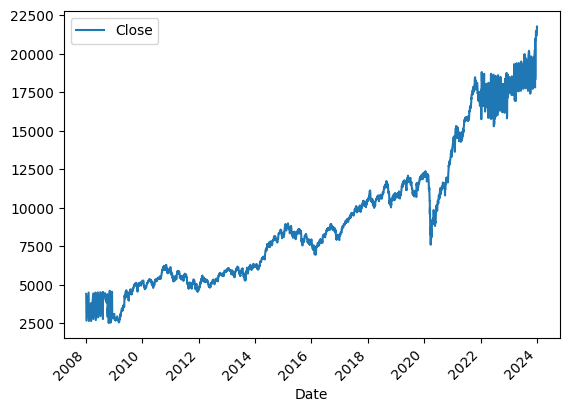

<Figure size 1600x1200 with 0 Axes>

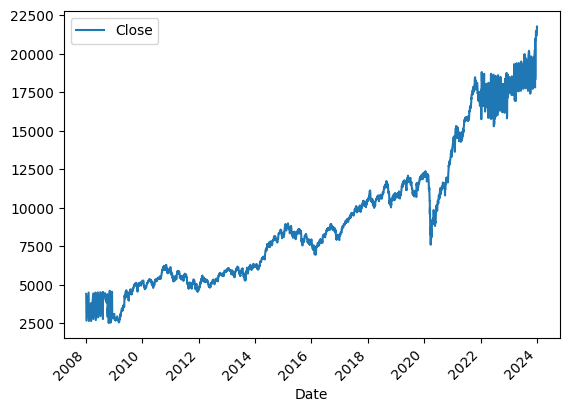

<Figure size 1600x1200 with 0 Axes>

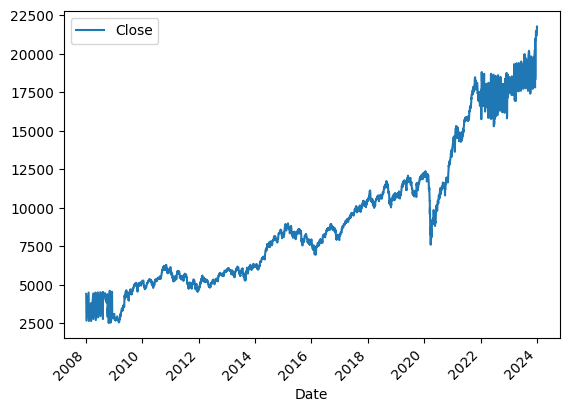

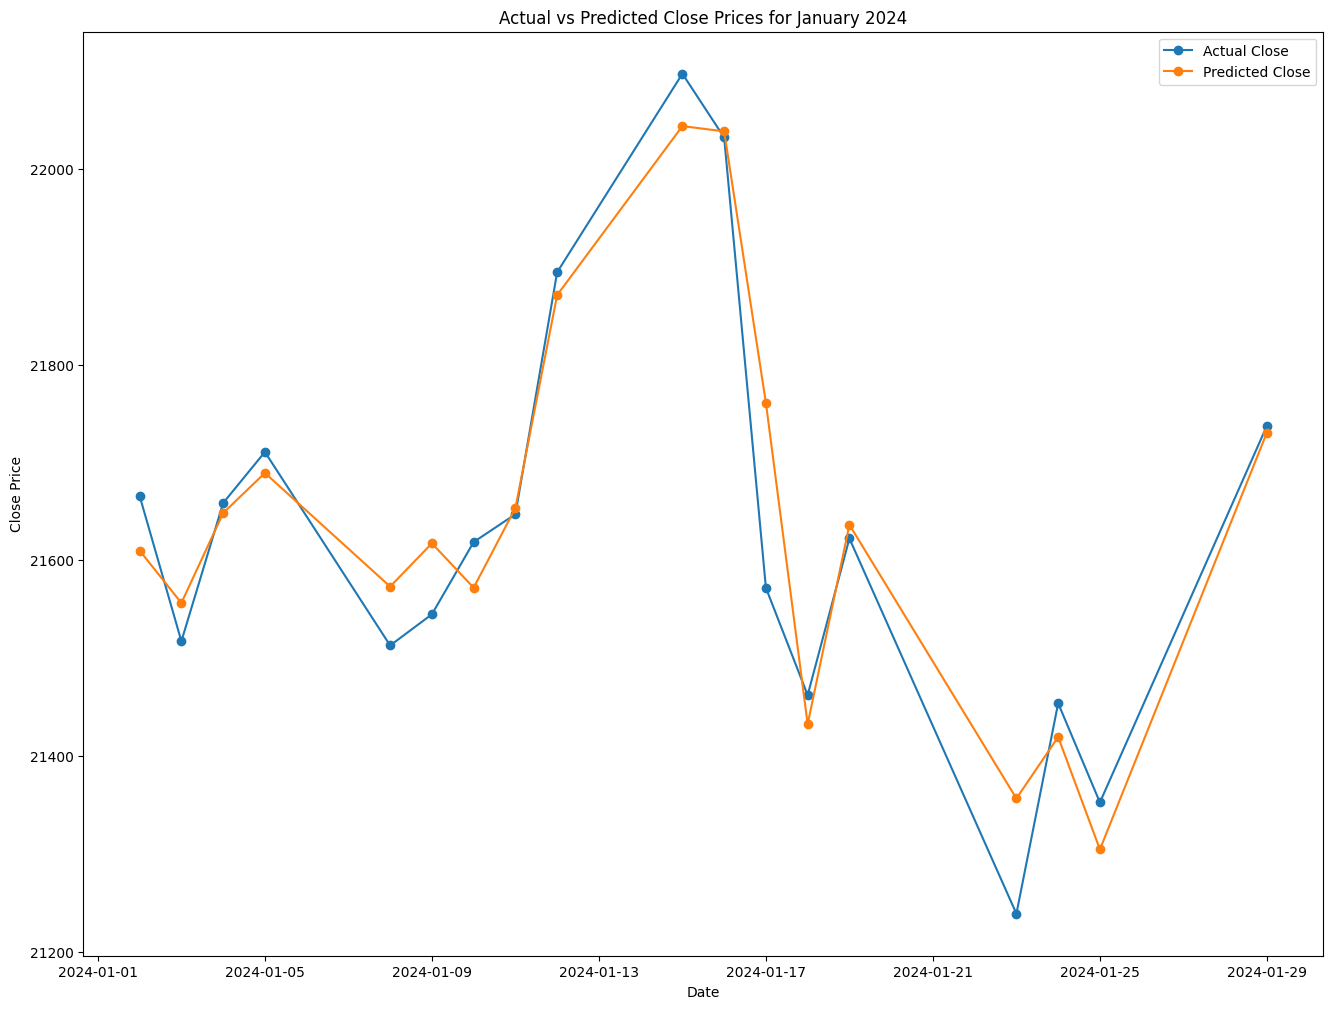

<ipython-input-33-a1b83d555604>:327: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

[*********************100%%**********************]  1 of 1 completed


Best Parameters: {'fit_intercept': True, 'positive': False}
Date		Actual		Predicted
2024-01-02 00:00:00	21665.80		21608.31
2024-01-03 00:00:00	21517.35		21554.92
2024-01-04 00:00:00	21658.60		21647.38
2024-01-05 00:00:00	21710.80		21688.33
2024-01-08 00:00:00	21513.00		21570.85
2024-01-09 00:00:00	21544.85		21615.69
2024-01-10 00:00:00	21618.70		21570.47
2024-01-11 00:00:00	21647.20		21652.39
2024-01-12 00:00:00	21894.55		21869.47
2024-01-15 00:00:00	22097.45		22042.62
2024-01-16 00:00:00	22032.30		22037.18
2024-01-17 00:00:00	21571.95		21758.65
2024-01-18 00:00:00	21462.25		21430.44
2024-01-19 00:00:00	21622.40		21635.61
2024-01-23 00:00:00	21238.80		21351.82
2024-01-24 00:00:00	21453.95		21416.82
2024-01-25 00:00:00	21352.60		21302.68
2024-01-29 00:00:00	21737.60		21728.09
R-squared Score on Yahoo Data for January 2024: 0.909048393710841


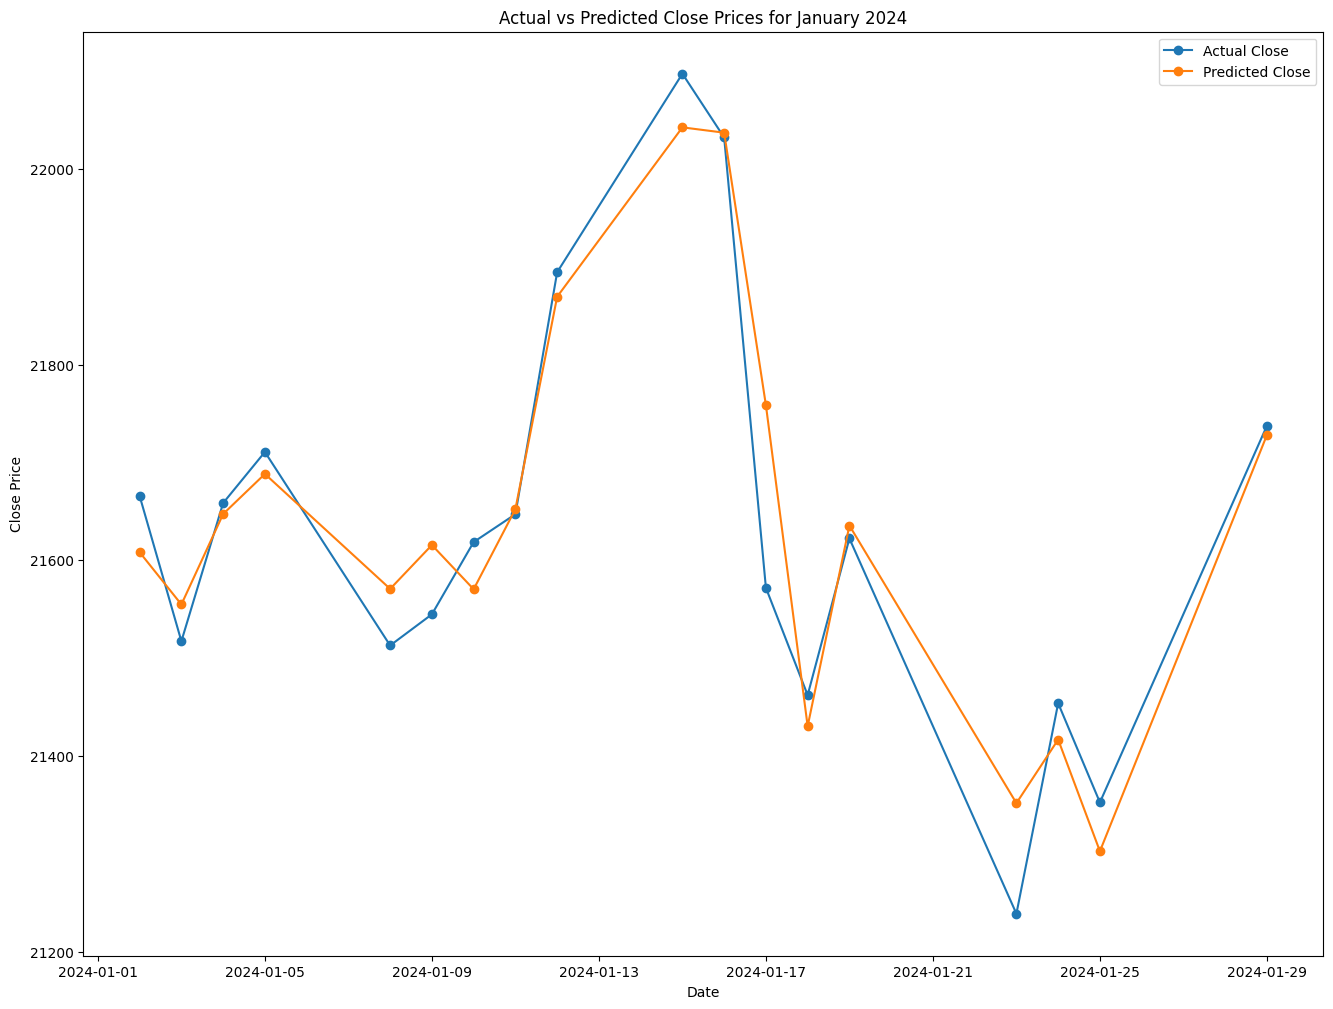

<ipython-input-33-a1b83d555604>:401: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

[*********************100%%**********************]  1 of 1 completed

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Date		Actual		Predicted
2024-01-02 00:00:00	21665.80		21641.97
2024-01-03 00:00:00	21517.35		21615.54
2024-01-04 00:00:00	21658.60		21603.21
2024-01-05 00:00:00	21710.80		21659.16
2024-01-08 00:00:00	21513.00		21629.54
2024-01-09 00:00:00	21544.85		21644.76
2024-01-10 00:00:00	21618.70		21581.71
2024-01-11 00:00:00	21647.20		21652.96
2024-01-12 00:00:00	21894.55		21650.64
2024-01-15 00:00:00	22097.45		21650.64
2024-01-16 00:00:00	22032.30		21650.64
2024-01-17 00:00:00	21571.95		21653.32
2024-01-18 00:00:00	21462.25		21415.64
2024-01-19 00:00:00	21622.40		21617.37
2024-01-23 00:00:00	21238.80		21314.26
2024-01-24 00:00:00	21453.95		21221.88
2024-01-25 00:00:00	21352.60		21425.63
2024-01-29 00:00:00	21737.60		21592.26
R-squared Score on Yahoo Data for January 2024: 0.3219332456835512


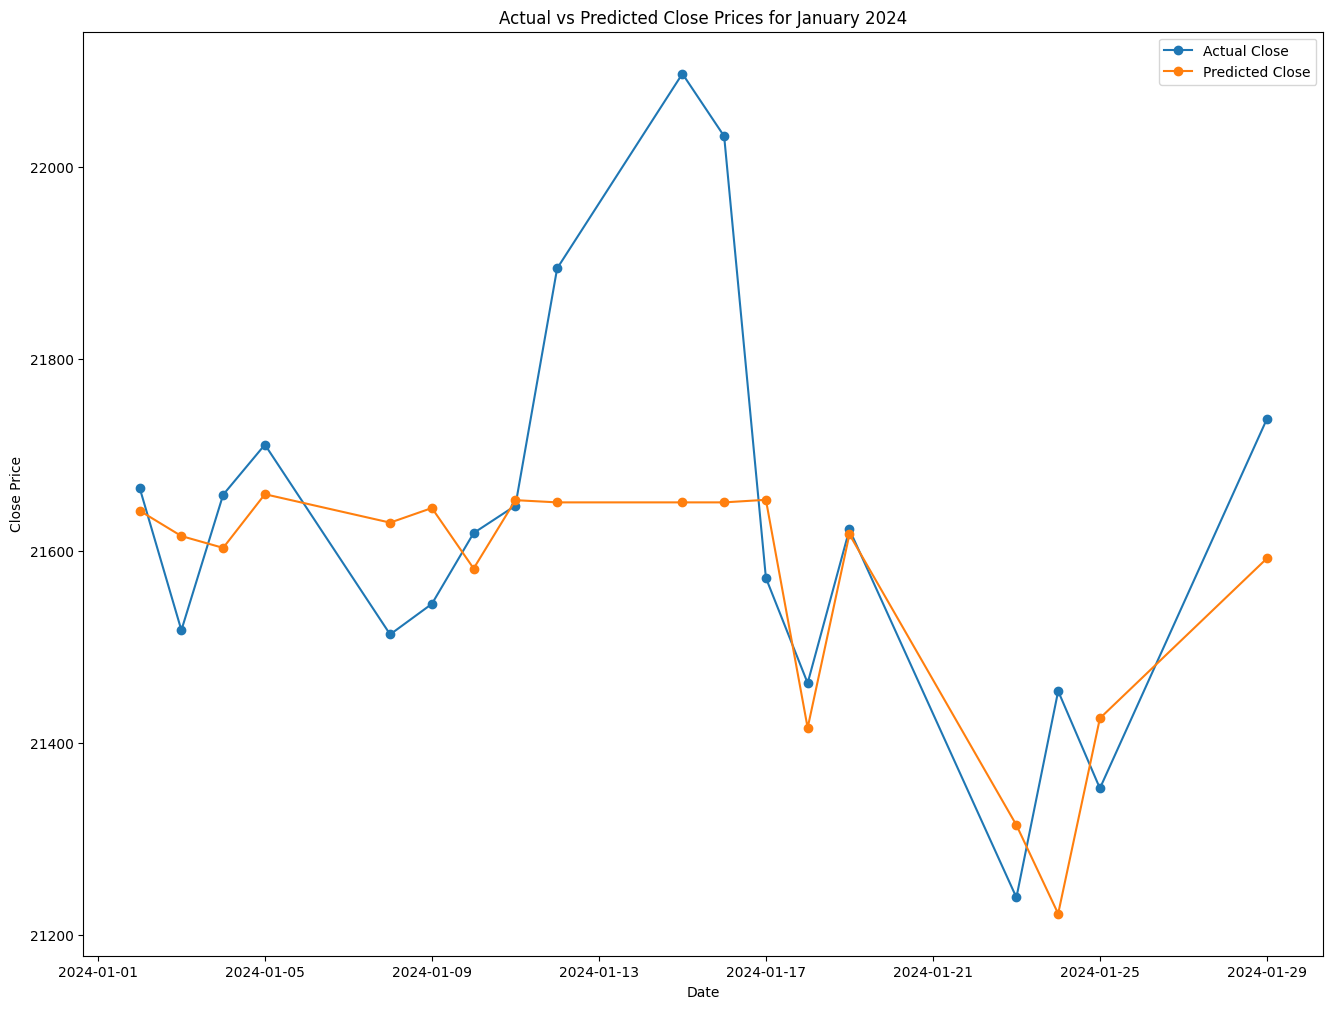

<ipython-input-33-a1b83d555604>:483: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

[*********************100%%**********************]  1 of 1 completed


Date		Actual		SVM Predicted	Linear Predicted	Random Forest Predicted
2024-01-02 00:00:00	21665.80		8932.44		21609.12		21687.48
2024-01-03 00:00:00	21517.35		8938.20		21555.74		21647.62
2024-01-04 00:00:00	21658.60		8937.75		21648.23		21652.81
2024-01-05 00:00:00	21710.80		8931.89		21689.19		21717.36
2024-01-08 00:00:00	21513.00		8933.90		21571.60		21655.22
2024-01-09 00:00:00	21544.85		8936.73		21616.48		21687.79
2024-01-10 00:00:00	21618.70		8943.87		21571.26		21602.62
2024-01-11 00:00:00	21647.20		8933.84		21653.24		21708.68
2024-01-12 00:00:00	21894.55		8923.46		21870.26		21708.37
2024-01-15 00:00:00	22097.45		8905.82		22043.48		21708.37
2024-01-16 00:00:00	22032.30		8904.79		22038.04		21708.37
2024-01-17 00:00:00	21571.95		8932.76		21759.36		21697.89
2024-01-18 00:00:00	21462.25		8953.83		21431.18		21439.41
2024-01-19 00:00:00	21622.40		8937.62		21636.48		21670.60
2024-01-23 00:00:00	21238.80		8942.43		21352.34		21326.67
2024-01-24 00:00:00	21453.95		8965.27		21417.45		21191.86
202

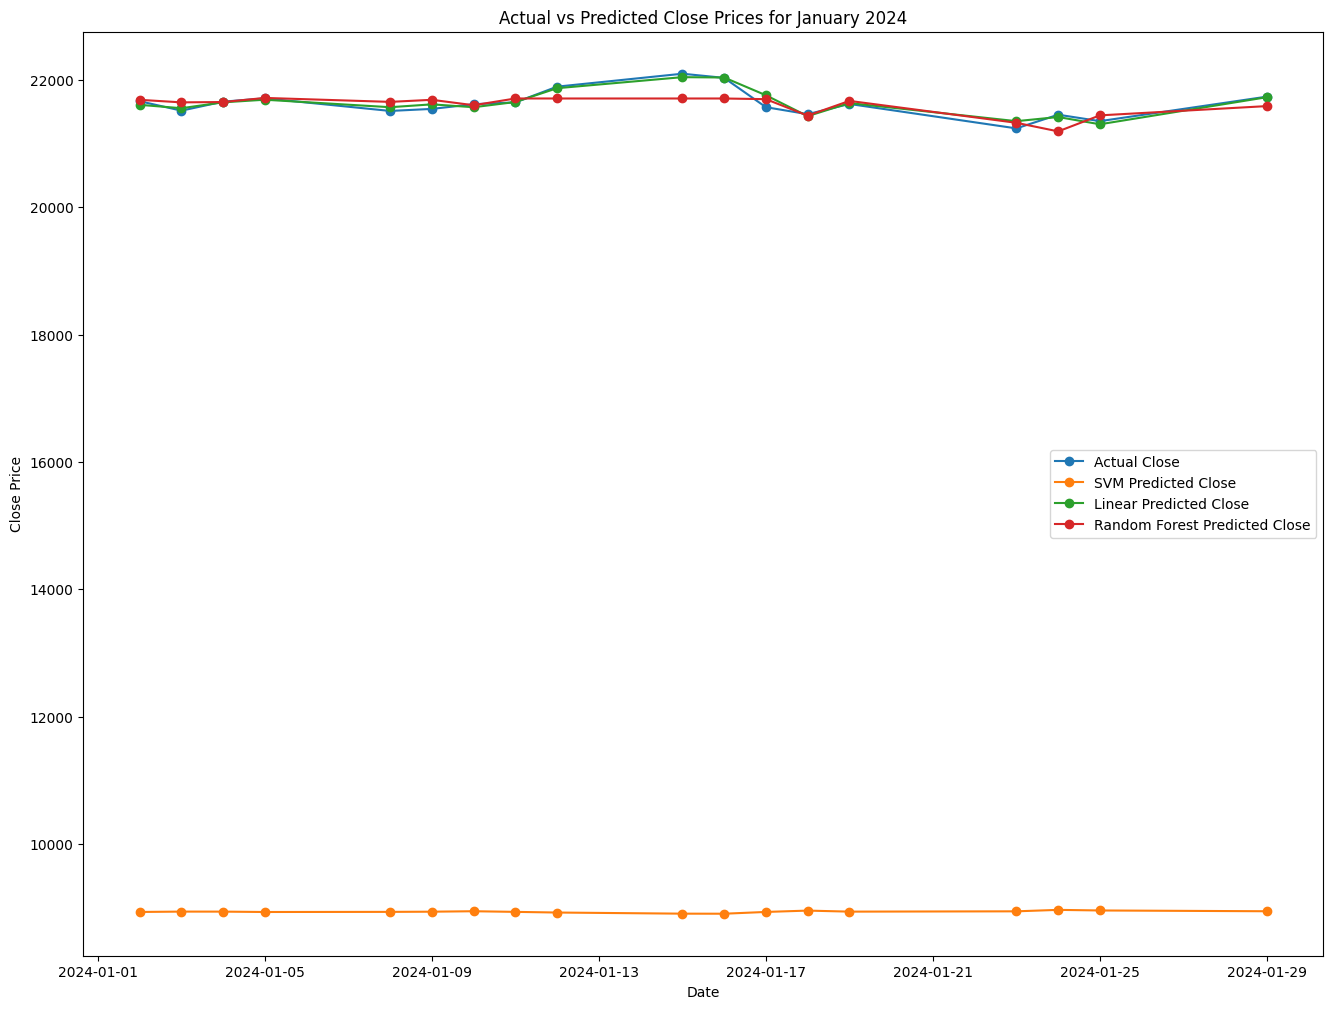

R2 Score for SVM on Test Set: 0.1647346970424578
R2 Score for Linear Regression on Test Set: 0.9999422023670337
R2 Score for Random Forest on Test Set: 0.999870799788877


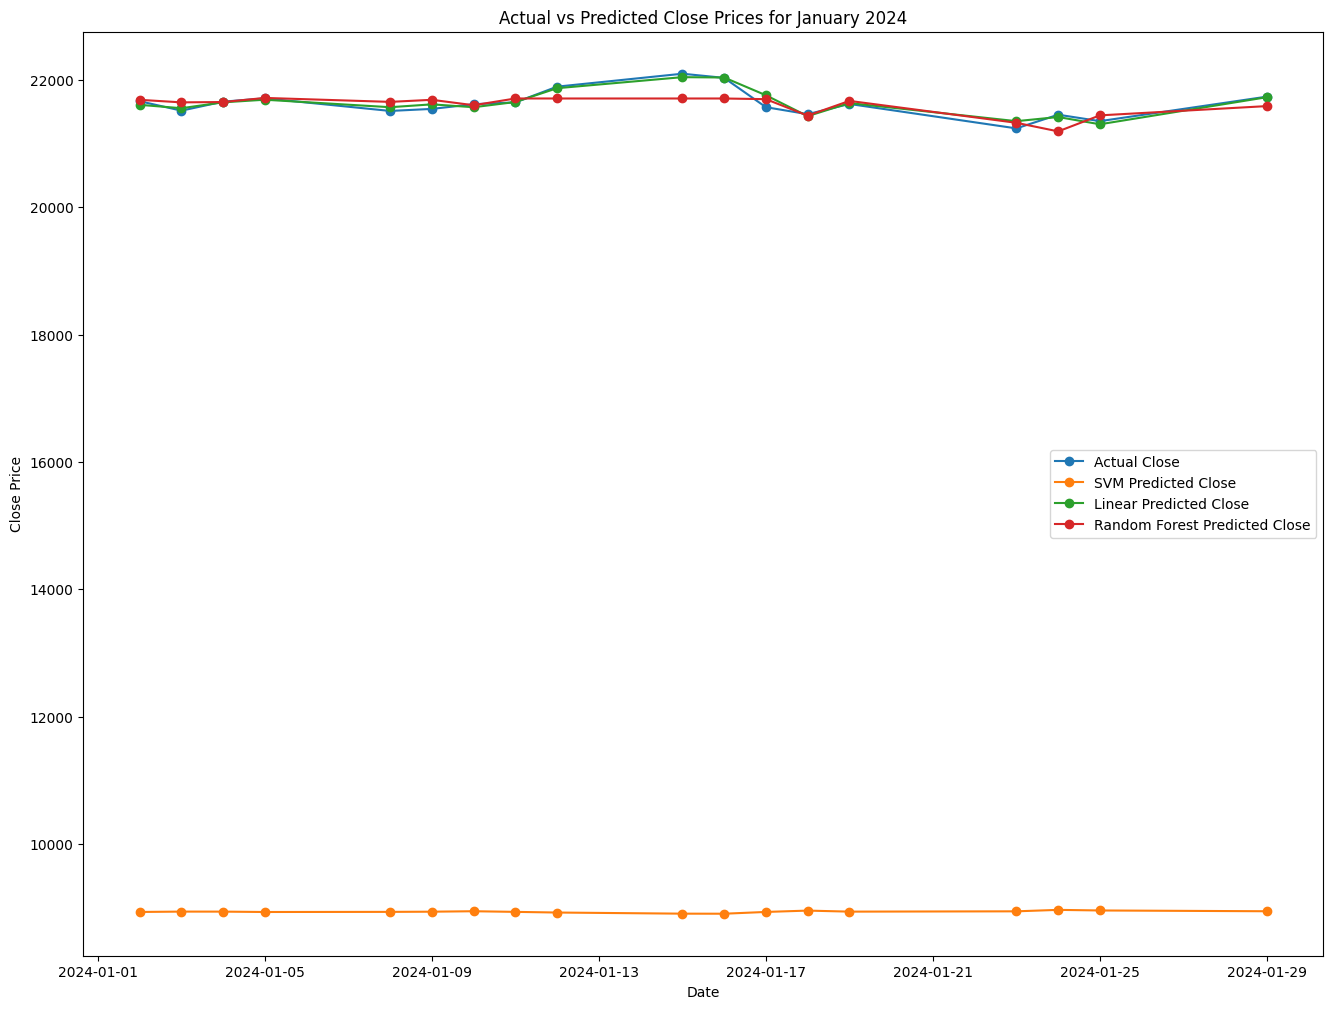

<ipython-input-33-a1b83d555604>:613: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-33-a1b83d555604>:616: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-33-a1b83d555604>:622: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-33-a

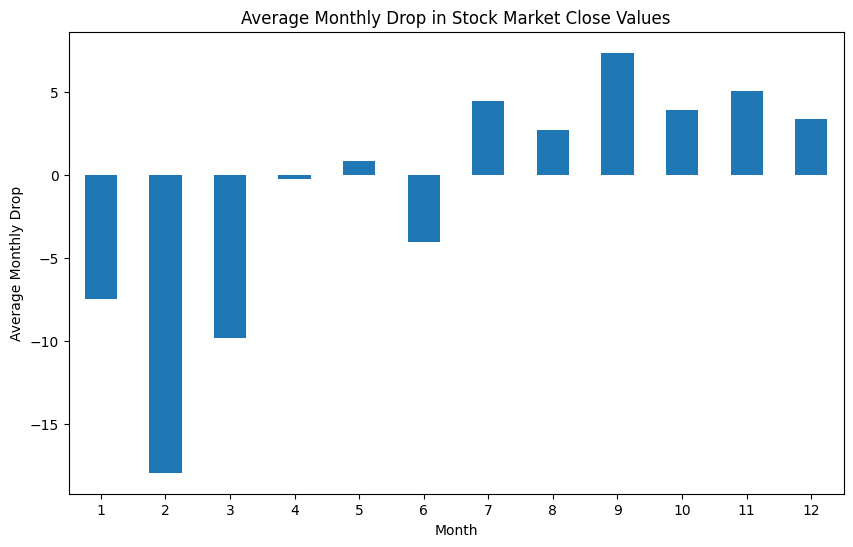

<ipython-input-33-a1b83d555604>:642: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-33-a1b83d555604>:645: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-33-a1b83d555604>:646: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-33-a

Linear Regression MSE: 1522.9667192599297
Selected Features: Index(['Open', 'High', 'Low'], dtype='object')
Best Hyperparameters: {'positive': False, 'fit_intercept': True}
MSE for Tuned Linear Regression on Test Set: 1255.17565533364
R2 Score for Tuned Linear Regression on Test Set: 0.9999422023670337


<ipython-input-33-a1b83d555604>:709: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [33]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt  # Combining the data from 2008-2023 to create a single dataset

csv_files = [
    "2022_Global_Markets_Data.csv",
    "2023_Global_Markets_Data.csv",
    "2014_Global_Markets_Data.csv",
    "2013_Global_Markets_Data.csv",
    "2012_Global_Markets_Data.csv",
    "2011_Global_Markets_Data.csv",
    "2010_Global_Markets_Data.csv",
    "2021_Global_Markets_Data.csv",
    "2020_Global_Markets_Data.csv",
    "2017_Global_Markets_Data.csv",
    "2018_Global_Markets_Data.csv",
    "2015_Global_Markets_Data.csv",
    "2016_Global_Markets_Data.csv",
    "2019_Global_Markets_Data.csv",
    "2009_Globla_Markets_Data.csv",
    "2008_Globla_Markets_Data.csv",
]
data_frames = []


for file in csv_files:
    df = pd.read_csv(file)
    data_frames.append(df)

merged_df = pd.concat(data_frames, ignore_index=True)

merged_df.drop("Adj Close", axis=1, inplace=True)

merged_df["Date"] = pd.to_datetime(merged_df["Date"])
merged_df.sort_values(by="Date", inplace=True)

# merged_df.to_csv("Total_Global_Markets_Data.csv", index=False)#Extracting the data for ^NSEI: Nifty 50 (National Stock Exchange of India)
df = merged_df[merged_df["Ticker"] == "^NSEI"]

df.head()
print("Null values in the entire DataFrame:")
print(df.isnull().any().any())

# Check for null values in each column
print("\nNull values in each column:")
print(df.isnull().any())

# Check for null values in each row
print("\nNull values in each row:")
print(df.isnull().sum(axis=1))
print("Duplicate rows in the entire DataFrame:")
print(df.duplicated().any())

# Check for duplicate rows based on specific columns
# For example, you can check for duplicates based on all columns
print("\nDuplicate rows based on all columns:")
print(df.duplicated().any())


def detect_outliers_zscore(df, columns, threshold=2.5):
    # Calculate outliers based on Z-scores for specified columns in the dataset
    z_scores = (df[columns] - df[columns].mean()) / df[columns].std()

    # Identify outliers based on the Z-score threshold
    outliers = (z_scores > threshold) | (z_scores < -threshold)

    return outliers


def main():

    # Set the threshold for Z-score
    z_score_threshold = 2.5
    # Identify numerical columns for outlier detection
    numerical_columns = df.select_dtypes(include=["float64", "int64"]).columns

    # Detect outliers in the dataset
    outliers = detect_outliers_zscore(
        df, columns=numerical_columns, threshold=z_score_threshold
    )

    # Display the original data and the identified outliers
    print("Original Data:")
    print(df)
    # Display only the rows corresponding to outliers
    print("\nOutliers:")
    print(outliers)
    print(df[outliers.any(axis=1)])
    # get_random_forest_model = random_forest_method(df)


if __name__ == "__main__":
    main()

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Function to fetch NSEI (Nifty 50) data from Yahoo Finance
def fetch_nsei_data_from_yahoo(start_date, end_date):
    nsei_data = yf.download("^NSEI", start=start_date, end=end_date)
    return nsei_data


# Fetch NSEI (Nifty 50) data from Yahoo Finance for the specified time range
start_date = "2024-01-01"
end_date = "2024-01-25"
nsei_data = fetch_nsei_data_from_yahoo(start_date, end_date)


# Convert 'Date' column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Visualizing the data
plt.figure(figsize=(16, 12))
df.plot(x="Date", y="Close")
plt.xticks(rotation=45)

# Create the model
model = RandomForestRegressor()

# Split the data into train and test (70% train, 30% test) from df
X = df[["Open", "High", "Low", "Volume"]]
Y = df["Close"]
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42
)

# Fitting the model on the training data
model.fit(X_train, Y_train)

# Test the model on the test set from df
train_score = model.score(X_train, Y_train)
test_score = model.score(X_test, Y_test)


print("Test Score:", test_score)


# Predict on the new dataset from Yahoo Finance
new_data_yahoo = nsei_data[["Open", "High", "Low", "Volume"]].tail(1)
prediction = model.predict(new_data_yahoo)

print("The Model predicts the last row to be:", prediction)
print("Actual Value is:", nsei_data["Close"].iloc[-1])
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Function to fetch NSEI (Nifty 50) data from Yahoo Finance
def fetch_nsei_data_from_yahoo(start_date, end_date):
    nsei_data = yf.download("^NSEI", start=start_date, end=end_date)
    return nsei_data


# Fetch NSEI (Nifty 50) data from Yahoo Finance for the specified time range
start_date = "2024-01-01"
end_date = "2024-01-25"
nsei_data = fetch_nsei_data_from_yahoo(start_date, end_date)

# Convert 'Date' column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Visualizing the data
plt.figure(figsize=(16, 12))
df.plot(x="Date", y="Close")
plt.xticks(rotation=45)

# Create the model (Support Vector Regressor)
model = SVR()

# Split the data into train and test (70% train, 30% test)
X = df[["Open", "High", "Low", "Volume"]]
Y = df["Close"]
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42
)

# Fitting the model on the training data
model.fit(X_train, Y_train)

# Test the model
train_score = model.score(X_train, Y_train)
test_score = model.score(X_test, Y_test)

print("Train Score:", train_score)
print("Test Score:", test_score)

# Predict on the new dataset from Yahoo Finance
new_data_yahoo = nsei_data[["Open", "High", "Low", "Volume"]].tail(1)
prediction = model.predict(new_data_yahoo)

print("The Model predicts the last row to be:", prediction)
print("Actual Value is:", nsei_data["Close"].iloc[-1])
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Function to fetch NSEI (Nifty 50) data from Yahoo Finance
def fetch_nsei_data_from_yahoo(start_date, end_date):
    nsei_data = yf.download("^NSEI", start=start_date, end=end_date)
    return nsei_data


# Fetch NSEI (Nifty 50) data from Yahoo Finance for the specified time range
start_date = "2024-01-01"
end_date = "2024-01-29"
nsei_data = fetch_nsei_data_from_yahoo(start_date, end_date)

# Convert 'Date' column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Visualizing the data
plt.figure(figsize=(16, 12))
df.plot(x="Date", y="Close")
plt.xticks(rotation=45)

# Create the model (Linear Regression)
model = LinearRegression()

# Split the data into train and test (70% train, 30% test)
X = df[["Open", "High", "Low", "Volume"]]
Y = df["Close"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Fitting the model on the training data
model.fit(X_train, Y_train)

# Test the model
train_score = model.score(X_train, Y_train)
test_score = model.score(X_test, Y_test)

print("Train Score:", train_score)
print("Test Score:", test_score)

# Predict on the new dataset from Yahoo Finance
new_data_yahoo = nsei_data[["Open", "High", "Low", "Volume"]].tail(1)
prediction = model.predict(new_data_yahoo)

print("The Model predicts the last row to be:", prediction)
print("Actual Value is:", nsei_data["Close"].iloc[-1])
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

##
# Function to fetch NSEI (Nifty 50) data from Yahoo Finance
def fetch_nsei_data_from_yahoo(start_date, end_date):
    nsei_data = yf.download("^NSEI", start=start_date, end=end_date)
    return nsei_data


# Fetch NSEI (Nifty 50) data from Yahoo Finance for the specified time range
start_date = "2024-01-01"
end_date = "2024-01-30"
nsei_data = fetch_nsei_data_from_yahoo(start_date, end_date)

# Assuming 'df' is your existing DataFrame containing historical data
# Convert 'Date' column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Create the model (Linear Regression)
model = LinearRegression()

# Use the entire dataset for training
X = df[["Open", "High", "Low", "Volume"]]
Y = df["Close"]
model.fit(X, Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Predict on the new dataset from Yahoo Finance for January 2024
new_data_yahoo = nsei_data[["Open", "High", "Low", "Volume"]]
predictions = model.predict(new_data_yahoo)

# Add the predictions to the new data DataFrame
nsei_data["Predicted_Close"] = predictions


from sklearn.metrics import r2_score

# Assuming 'Y_test' contains the actual 'Close' prices for the test set
Y_test = nsei_data["Close"]

# Calculate the R-squared score
r2 = r2_score(Y_test, predictions)
print("R-squared Score:", r2)

# Print the predicted and actual values for the month of January 2024
print("Actual Close\tPredicted Close")
for index, row in nsei_data.iterrows():
    print(f"{row['Close']}\t{row['Predicted_Close']}")

# Visualize the results
plt.figure(figsize=(16, 12))
plt.plot(nsei_data["Close"], label="Actual Close", marker="o")
plt.plot(nsei_data["Predicted_Close"], label="Predicted Close", marker="o")
plt.title("Actual vs Predicted Close Prices for January 2024")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Function to fetch NSEI (Nifty 50) data from Yahoo Finance
def fetch_nsei_data_from_yahoo(start_date, end_date):
    nsei_data = yf.download("^NSEI", start=start_date, end=end_date)
    return nsei_data


# Assuming 'df' is your existing DataFrame containing historical data
# Convert 'Date' column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Create the model (Linear Regression)
model = LinearRegression()

# Use the entire dataset for training
X = df[["Open", "High", "Low", "Volume"]]
Y = df["Close"]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Define hyperparameters to search
param_grid = {"fit_intercept": [True, False], "positive": [False]}

# Create GridSearchCV object
grid_search = GridSearchCV(model, param_grid, scoring="r2", cv=5)

# Perform grid search on the training data
grid_search.fit(X_train, Y_train)

# Print the best parameters found by the grid search
print("Best Parameters:", grid_search.best_params_)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Predict on the new dataset from Yahoo Finance for January 2024
start_date_yahoo = "2024-01-01"
end_date_yahoo = "2024-01-30"
nsei_data_yahoo = fetch_nsei_data_from_yahoo(start_date_yahoo, end_date_yahoo)

# Extract features for prediction from Yahoo Finance data
new_data_yahoo = nsei_data_yahoo[["Open", "High", "Low", "Volume"]]
predictions_yahoo = best_model.predict(new_data_yahoo)

# Add the predictions to the Yahoo Finance data DataFrame
nsei_data_yahoo["Predicted_Close"] = predictions_yahoo

# Print actual vs predicted values for January 2024
print("Date\t\tActual\t\tPredicted")
for date, actual, predicted in zip(
    nsei_data_yahoo.index, nsei_data_yahoo["Close"], predictions_yahoo
):
    print(f"{date}\t{actual:.2f}\t\t{predicted:.2f}")

# Calculate R-squared score on the test set
r2_test = r2_score(nsei_data_yahoo["Close"], predictions_yahoo)
print("R-squared Score on Yahoo Data for January 2024:", r2_test)

# Visualize the results
plt.figure(figsize=(16, 12))
plt.plot(nsei_data_yahoo["Close"], label="Actual Close", marker="o")
plt.plot(nsei_data_yahoo["Predicted_Close"], label="Predicted Close", marker="o")
plt.title("Actual vs Predicted Close Prices for January 2024")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Function to fetch NSEI (Nifty 50) data from Yahoo Finance
def fetch_nsei_data_from_yahoo(start_date, end_date):
    nsei_data = yf.download("^NSEI", start=start_date, end=end_date)
    return nsei_data


# Assuming 'df' is your existing DataFrame containing historical data
# Convert 'Date' column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Create the model (Random Forest Regressor)
model = RandomForestRegressor()

# Use the entire dataset for training
X = df[["Open", "High", "Low"]]
Y = df["Close"]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Define hyperparameters to search
param_grid = {
    "n_estimators": [10, 50, 100],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

# Create GridSearchCV object
grid_search = GridSearchCV(model, param_grid, scoring="r2", cv=5)

# Perform grid search on the training data
grid_search.fit(X_train, Y_train)

# Print the best parameters found by the grid search
print("Best Parameters:", grid_search.best_params_)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Predict on the new dataset from Yahoo Finance for January 2024
start_date_yahoo = "2024-01-01"
end_date_yahoo = "2024-01-30"
nsei_data_yahoo = fetch_nsei_data_from_yahoo(start_date_yahoo, end_date_yahoo)

# Extract features for prediction from Yahoo Finance data
new_data_yahoo = nsei_data_yahoo[["Open", "High", "Low", "Volume"]]
predictions_yahoo = best_model.predict(new_data_yahoo)

# Add the predictions to the Yahoo Finance data DataFrame
nsei_data_yahoo["Predicted_Close"] = predictions_yahoo

# Print actual vs predicted values for January 2024
print("Date\t\tActual\t\tPredicted")
for date, actual, predicted in zip(
    nsei_data_yahoo.index, nsei_data_yahoo["Close"], predictions_yahoo
):
    print(f"{date}\t{actual:.2f}\t\t{predicted:.2f}")

# Calculate R-squared score on the test set
r2_test = r2_score(nsei_data_yahoo["Close"], predictions_yahoo)
print("R-squared Score on Yahoo Data for January 2024:", r2_test)

# Visualize the results
plt.figure(figsize=(16, 12))
plt.plot(nsei_data_yahoo["Close"], label="Actual Close", marker="o")
plt.plot(nsei_data_yahoo["Predicted_Close"], label="Predicted Close", marker="o")
plt.title("Actual vs Predicted Close Prices for January 2024")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Function to fetch NSEI (Nifty 50) data from Yahoo Finance
def fetch_nsei_data_from_yahoo(start_date, end_date):
    nsei_data = yf.download("^NSEI", start=start_date, end=end_date)
    return nsei_data


# Assuming 'df' is your existing DataFrame containing historical data
# Convert 'Date' column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Create the model for SVM
svm_model = SVR()
# Create the model for Linear Regression
linear_model = LinearRegression()
# Create the model for Random Forest
rf_model = RandomForestRegressor()

# Use the entire dataset for training
X = df[["Open", "High", "Low"]]
Y = df["Close"]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Train the models
svm_model.fit(X_train, Y_train)
linear_model.fit(X_train, Y_train)
rf_model.fit(X_train, Y_train)


# Predict on the new dataset from Yahoo Finance for January 2024
start_date_yahoo = "2024-01-01"
end_date_yahoo = "2024-01-30"
nsei_data_yahoo = fetch_nsei_data_from_yahoo(start_date_yahoo, end_date_yahoo)

# Extract features for prediction from Yahoo Finance data
new_data_yahoo = nsei_data_yahoo[["Open", "High", "Low"]]

# SVM predictions
svm_predictions_yahoo = svm_model.predict(new_data_yahoo)
# Linear Regression predictions
linear_predictions_yahoo = linear_model.predict(new_data_yahoo)
# Random Forest predictions
rf_predictions_yahoo = rf_model.predict(new_data_yahoo)

# Print actual vs predicted values for January 2024
print("Date\t\tActual\t\tSVM Predicted\tLinear Predicted\tRandom Forest Predicted")
for date, actual, svm_pred, linear_pred, rf_pred in zip(
    nsei_data_yahoo.index,
    nsei_data_yahoo["Close"],
    svm_predictions_yahoo,
    linear_predictions_yahoo,
    rf_predictions_yahoo,
):
    print(
        f"{date}\t{actual:.2f}\t\t{svm_pred:.2f}\t\t{linear_pred:.2f}\t\t{rf_pred:.2f}"
    )

# Calculate MSE on the test set
mse_svm = mean_squared_error(Y_test, svm_model.predict(X_test))
mse_linear = mean_squared_error(Y_test, linear_model.predict(X_test))
mse_rf = mean_squared_error(Y_test, rf_model.predict(X_test))


print("MSE for SVM on Test Set:", mse_svm)
print("MSE for Linear Regression on Test Set:", mse_linear)
print("MSE for Random Forest on Test Set:", mse_rf)

# Visualize the results
plt.figure(figsize=(16, 12))
plt.plot(nsei_data_yahoo["Close"], label="Actual Close", marker="o")
plt.plot(
    nsei_data_yahoo.index,
    svm_predictions_yahoo,
    label="SVM Predicted Close",
    marker="o",
)
plt.plot(
    nsei_data_yahoo.index,
    linear_predictions_yahoo,
    label="Linear Predicted Close",
    marker="o",
)
plt.plot(
    nsei_data_yahoo.index,
    rf_predictions_yahoo,
    label="Random Forest Predicted Close",
    marker="o",
)

plt.title("Actual vs Predicted Close Prices for January 2024")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()


# Calculate R2 score on the test set
r2_svm = r2_score(Y_test, svm_model.predict(X_test))
r2_linear = r2_score(Y_test, linear_model.predict(X_test))
r2_rf = r2_score(Y_test, rf_model.predict(X_test))

print("R2 Score for SVM on Test Set:", r2_svm)
print("R2 Score for Linear Regression on Test Set:", r2_linear)
print("R2 Score for Random Forest on Test Set:", r2_rf)

# Visualize the results
plt.figure(figsize=(16, 12))
plt.plot(nsei_data_yahoo["Close"], label="Actual Close", marker="o")
plt.plot(
    nsei_data_yahoo.index,
    svm_predictions_yahoo,
    label="SVM Predicted Close",
    marker="o",
)
plt.plot(
    nsei_data_yahoo.index,
    linear_predictions_yahoo,
    label="Linear Predicted Close",
    marker="o",
)
plt.plot(
    nsei_data_yahoo.index,
    rf_predictions_yahoo,
    label="Random Forest Predicted Close",
    marker="o",
)

plt.title("Actual vs Predicted Close Prices for January 2024")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()  # Importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt


# Converting the 'Date' column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Extracting the year from the 'Date' column
df["Year"] = df["Date"].dt.year

# Clustering the yearly data
yearly_data = df.groupby("Year").agg({"Close": "mean"})

# Calculating the monthly drops from previous month's close value
df["Prev_Close"] = df.groupby(["Year", df["Date"].dt.month])["Close"].shift(1)
df["Monthly_Drop"] = df["Close"] - df["Prev_Close"]

# Analyzing the consistent drop in all years
consistent_drop = df.groupby(df["Date"].dt.month)["Monthly_Drop"].mean().idxmin()

# Plotting the graph
plt.figure(figsize=(10, 6))
df.groupby(df["Date"].dt.month)["Monthly_Drop"].mean().plot(kind="bar")
plt.xlabel("Month")
plt.ylabel("Average Monthly Drop")
plt.title("Average Monthly Drop in Stock Market Close Values")
plt.xticks(rotation=0)
plt.show()
import pandas as pd
import plotly.express as px

# Assuming the stock market data is stored in a DataFrame called 'df'

# Convert the 'Date' column to datetime
df["Date"] = pd.to_datetime(df["Date"])

# Extract the year and month from the 'Date' column
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month

# Calculate the drop in each month from the previous month's closing value
df["Drop"] = df.groupby(["Year", "Month"])["Close"].diff()

# Calculate the total drop in each month from the previous month's closing value
monthly_drop = df.groupby(["Year", "Month"])["Drop"].sum().reset_index()

# Identify the months with consistent drops in all years
consistent_drops = monthly_drop.groupby("Month").filter(
    lambda x: x["Year"].nunique() == df["Year"].nunique()
)

# Plot the monthly drops using Plotly
fig = px.line(
    consistent_drops,
    x="Month",
    y="Drop",
    color="Year",
    title="Monthly Drops in Stock Market",
)
fig.show()
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming you have a DataFrame called df with your stock market analysis data
# Replace 'target_column' with the actual target variable (e.g., 'Close' for predicting closing prices)

# Use the entire dataset for training
X = df[["Open", "High", "Low"]]
Y = df["Close"]



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


k_best = SelectKBest(score_func=f_regression, k=3)
X_train_selected = k_best.fit_transform(X_train, y_train)
X_test_selected = k_best.transform(X_test)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_selected, y_train)
lr_predictions = lr_model.predict(X_test_selected)
lr_mse = mean_squared_error(y_test, lr_predictions)
print("Linear Regression MSE:", lr_mse)

# Print the selected feature indices
selected_feature_indices = k_best.get_support(indices=True)
selected_features = X.columns[selected_feature_indices]
print("Selected Features:", selected_features)

from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression

# Assuming 'df' is your existing DataFrame containing historical data
# Convert 'Date' column to datetime format
df["Date"] = pd.to_datetime(df["Date"])


# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Create the model for Linear Regression
linear_model = LinearRegression()

# Define the hyperparameter grid for Linear Regression
param_grid = {"fit_intercept": [True, False], "positive": [False, True]}

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    linear_model,
    param_distributions=param_grid,
    n_iter=4,
    cv=5,
    scoring="neg_mean_squared_error",
    random_state=0,
)
random_search.fit(X_train, Y_train)

# Get the best parameters from the randomized search
best_params = random_search.best_params_

# Train the Linear Regression model with the best parameters
linear_model_tuned = LinearRegression(**best_params)
linear_model_tuned.fit(X_train, Y_train)

# Predict on the test set
linear_predictions_tuned = linear_model_tuned.predict(X_test)

# Calculate MSE and R2 score on the test set
mse_linear_tuned = mean_squared_error(Y_test, linear_predictions_tuned)
r2_linear_tuned = r2_score(Y_test, linear_predictions_tuned)

print("Best Hyperparameters:", best_params)
print("MSE for Tuned Linear Regression on Test Set:", mse_linear_tuned)
print("R2 Score for Tuned Linear Regression on Test Set:", r2_linear_tuned)